----
# Analysis of the SA optimization
----

We optimized Tree-Tensor Networks (TNNs) using Simulated Annealing (SA).  
Here we visalize and analyze the results.

Date and content of runs:
- `2023-10-05`: small run to test the notebook. No MPI parallelization.
- `TEST`: small test with MPI parallelization (performed on 2023-11-27).
- `2023-11-27`: run for data collection. With MPI parallelization.

Sections:
- <a href=#load>Load the dataframe</a>
- <a href=#next>WIP</a>

----
<a id='top'></a>

In [35]:
# Set working directory to be the main directory of the repo.
import os
#try:
#    was_cwd_initialized
#except NameError:
#    os.chdir('ttn_learning/')
#    was_cwd_initialized = True
print('working directory:', os.getcwd())

import numpy as np              # Import NumPy library
import matplotlib.pyplot as plt # Import graphical library for plots
import pandas as pd
import sys
sys.path.insert(0, 'ttn_demo')
sys.path.insert(0, 'ttn_learning')
import ttn

# Name of files and directories
today = 'TEST'
today = '2023-11-27'
data_path = f'ttn_learning/data/{today}_TTN_SA'
L = 16
site_dim = 2
bond_size = 3

# For certain runs, there is no way to know the slurm_jobid and slurm_procid if not manually.
if today == '2023-10-05':
    slurm_jobid = '1696495532'
    slurm_procid= '1696495532'
elif today == '2023-11-27':
    if L == 16 and bond_size == 3:
        slurm_jobid = '19472'
        slurm_procid= '0'
    elif L == 24 and bond_size == 3:
        slurm_jobid = '19450'
        slurm_procid= '0'
elif today == 'TEST':
    L = 16
    bond_size = 3
    slurm_jobid = '19434'
    slurm_procid = '0'

working directory: /data/nfs_home/giangiac/pando-TN


<a id='load'></a>

----
## Load the dataframe and visualize its content

<a href=#top>Back to top</a>

In [36]:
run = 23
if today == '2023-10-05':
    file_id =  f'TTN_SA_{slurm_jobid}_{slurm_procid}_{run}_L{L}_D{site_dim}'
else:
    file_id =  f'TTN_SA_{slurm_jobid}_{slurm_procid}_{run}_L{L}_D{site_dim}_m{bond_size}'

with open(f'{data_path}/{file_id}_summary.pkl', 'rb') as f:
    df = pd.read_pickle(f)
print(df)
print(isinstance(df['state'][1], ttn.TTN))
print(isinstance(df['state'][2], ttn.TTN))

                                               state     energy
0  TTN([\n    Tensor(shape=(2, 2), inds=('p15', '... -10.692101
1                                               None -10.677020
2  TTN([\n    Tensor(shape=(2, 2), inds=('p0', '_... -10.692845
3                                               None -10.675985
4                                               None -10.679041
5                                               None -10.661255
False
True


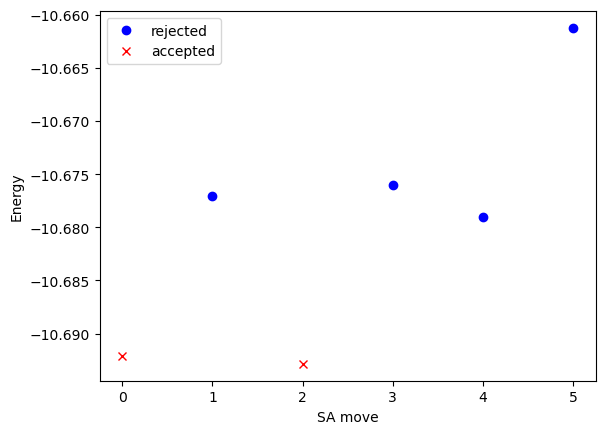

In [37]:
fig, ax = plt.subplots()

# Plot the data with 'o' marker for states where 'state' is None
ax.plot(df.index[~df['state'].notna()], df['energy'][~df['state'].notna()],
        marker='o', linestyle='', color='b', label='rejected')
# Plot the data with 'x' marker for accepted states
ax.plot(df.index[df['state'].notna()], df['energy'][df['state'].notna()],
        marker='x', linestyle='', color='r', label='accepted')

ax.set_xlabel('SA move')
ax.set_ylabel('Energy')
ax.legend()

plt.show()

----
## END
----